In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import *
import itertools
from IPython.display import display
init_printing() #allows nice math displays

In this notebook, I will use the QuantumMatrix class provided in this link: https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/terra/qis_adv/Clifford_Group.ipynb. It offers a good way to visualize the matrix and also takes care of the phase and coefficients thus allowing more direct comparison

In [19]:
class QuantumMatrix():
    def __init__(self, m, coeff = 1):
        self.matrix = sympy.Matrix(m)
        self.coefficient = coeff
        self.canonize()
        
    def canonize(self):
        a = next((x for x in self.matrix if x != 0), None)
        if a is not None: #zero vector
            for i,j in itertools.product([0,1], [0,1]):
                self.matrix[i,j] = sympy.simplify(self.matrix[i,j] / a)
        self.coefficient = sympy.simplify(self.coefficient * a) 
            
    def __str__(self):
        coeff_string = ""
        if self.coefficient != 1:
            coeff_string = "{} * ".format(self.coefficient)
        return "{}[[{}, {}], [{}, {}]]".format(coeff_string,self.matrix[0], self.matrix[1], self.matrix[2], self.matrix[3])
    
    def __mul__(self, rhs):
        return QuantumMatrix(self.matrix * rhs.matrix, self.coefficient * rhs.coefficient)
    
    def __add__(self, rhs):
        temp_rhs_matrix = sympy.Matrix([[1,0],[0,1]])
        for i,j in itertools.product([0,1], [0,1]):
                 temp_rhs_matrix[i,j] = sympy.simplify((rhs.matrix[i,j] * self.coefficient) / rhs.coefficient)
        return QuantumMatrix(self.matrix + temp_rhs_matrix, self.coefficient * 1/sympy.sqrt(2))
    
    def __sub__(self, rhs):
        return self + QuantumMatrix(rhs.matrix, rhs.coefficient * -1)
    
    def __eq__(self, rhs):
        return (self.matrix == rhs.matrix and self.coefficient == rhs.coefficient)
    
    def equiv(self, rhs):
        return (self.matrix == rhs.matrix)
    
    def __iter__(self):
        for x in self.matrix:
             yield x

**First, we define some gates using S and H gates** 

Hadamard Gates and S Gate

In [33]:
S = QuantumMatrix( [[1,0],  [0,sympy.I]])
Sdg = QuantumMatrix( [[1,0],  [0,-sympy.I]])
H = QuantumMatrix( [[1,1],  [1,-1]], 1/sympy.sqrt(2))

I = QuantumMatrix( [[1,0],  [0,1]])

Pauli Groups

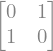

In [34]:
X = H * S * S * H
display(sympy.Matrix(X.matrix))

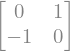

In [35]:
Y = S * X * Sdg
display(sympy.Matrix(Y.matrix))

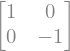

In [36]:
Z = S * S
display(sympy.Matrix(Z.matrix))

The Axis Swap Group

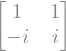

In [37]:
V = H * S * H * S
display(sympy.Matrix(V.matrix))

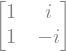

In [38]:
W = H * S
display(sympy.Matrix(W.matrix))

**24 Elements in Clifford Group**

Since the Clifford group is defined as the group of unitaries that normalize the Pauli group, we can write the one-qubit elements as $C_1 = AB$, where $A \in \{ I, V, W, H, HV, HW\}$ and $ B \in \{ I, X, Y, Z\}$ 

I=


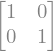

X=


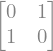

Y=


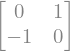

Z=


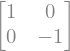

In [39]:
# When A = I
print ("I=")
display(sympy.Matrix(I.matrix))
print ("X=")
display(sympy.Matrix(X.matrix))
print ("Y=")
display(sympy.Matrix(Y.matrix))
print ("Z=")
display(sympy.Matrix(Z.matrix))

V=


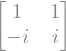

VX=


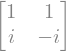

VY=


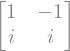

VZ=


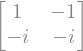

In [40]:
# When A = V

# For simplicity, I will directly use V and XYZ gates, but the transformation to H ans S gates are below:
# V = H * S * H * S
# X = H * S * S * H
# Y = S * X * Sdg
# Z = S * S

print ("V=")
display(sympy.Matrix(V.matrix))
A = V * X
print ("VX=")
display(sympy.Matrix(A.matrix))
A = V * Y
print ("VY=")
display(sympy.Matrix(A.matrix))
A = V * Z
print ("VZ=")
display(sympy.Matrix(A.matrix))

W=


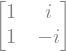

WX=


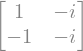

WY=


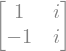

WZ=


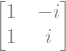

In [41]:
# When A = W

# For simplicity, I will directly use W and XYZ gates, but the transformation to H ans S gates are below:
# W = S * Z * H * S * Z * H
# X = H * S * S * H
# Y = S * X * Sdg
# Z = S * S

print ("W=")
display(sympy.Matrix(W.matrix))
A = W * X
print ("WX=")
display(sympy.Matrix(A.matrix))
A = W * Y
print ("WY=")
display(sympy.Matrix(A.matrix))
A = W * Z
print ("WZ=")
display(sympy.Matrix(A.matrix))

H=


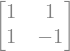

HX=


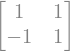

HY=


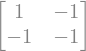

HZ=


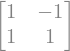

In [42]:
# When A = H

# For simplicity, I will directly use \ XYZ gates, but the transformation to H ans S gates are below:
# X = H * S * S * H
# Y = S * X * Sdg
# Z = S * S

print ("H=")
display(sympy.Matrix(H.matrix))
A = H * X
print ("HX=")
display(sympy.Matrix(A.matrix))
A = H * Y
print ("HY=")
display(sympy.Matrix(A.matrix))
A = H * Z
print ("HZ=")
display(sympy.Matrix(A.matrix))

HV=


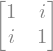

HVX=


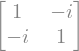

HVY=


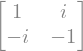

HVZ=


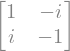

In [45]:
# When A = HV

# For simplicity, I will directly use V and XYZ gates, but the transformation to H ans S gates are below:
# W = S * Z * H * S * Z * H
# X = H * S * S * H
# Y = S * X * Sdg
# Z = S * S

print ("HV=")
A = H * V
display(sympy.Matrix(A.matrix))
A = H * V * X
print ("HVX=")
display(sympy.Matrix(A.matrix))
A = H * V * Y
print ("HVY=")
display(sympy.Matrix(A.matrix))
A = H * V * Z
print ("HVZ=")
display(sympy.Matrix(A.matrix))

HW=


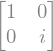

HWX=


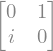

HWY=


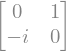

HWZ=


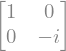

In [46]:
# When A = HW

# For simplicity, I will directly use W and XYZ gates, but the transformation to H ans S gates are below:
# HW = H * S * H * S
# X = H * S * S * H
# Y = S * X * Sdg
# Z = S * S

print ("HW=")
A = H * W
display(sympy.Matrix(A.matrix))
A = H * W * X
print ("HWX=")
display(sympy.Matrix(A.matrix))
A = H * W * Y
print ("HWY=")
display(sympy.Matrix(A.matrix))
A = H * W * Z
print ("HWZ=")
display(sympy.Matrix(A.matrix))

**Expressing Clifford Gates Using IonQ native Gates**

In [74]:
# Rotation matrices as a function of theta, e.g. Rx(theta), etc.
GPI = lambda phi : QuantumMatrix( [[0,sympy.exp(-sympy.I * phi)], 
                                   [sympy.exp(sympy.I * phi),0]])


GPI2 = lambda phi : QuantumMatrix( [[1, -sympy.I * sympy.exp(-sympy.I * phi)], 
                                     [ -sympy.I * sympy.exp(sympy.I * phi),1]], 1/sympy.sqrt(2))

GZ= lambda theta : QuantumMatrix( [[sympy.exp(-sympy.I * theta),0], 
                                   [0,sympy.exp(sympy.I * theta)]])

Then we can write Pauli gates in terms of native gates by choosing an appropirate angle

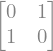

In [89]:
X =  GPI(sympy.pi)
display(sympy.Matrix(X.matrix))

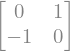

In [81]:
Y =  GPI(sympy.pi/2)
display(sympy.Matrix(Y.matrix))

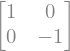

In [80]:
Z =  GZ(sympy.pi/2)
display(sympy.Matrix(Z.matrix))

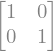

In [116]:
I =  GZ(0)
display(sympy.Matrix(I.matrix))

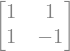

In [117]:
H = GPI(sympy.pi) * GPI2(sympy.pi/2)
display(sympy.Matrix(H.matrix))

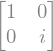

In [118]:
S =  GPI(sympy.pi/4) * GPI(sympy.pi)
display(sympy.Matrix(S.matrix))
# Note that the following matrix form has been simplified such that the coefficient has been factored out

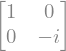

In [123]:
Sdg = GPI(-sympy.pi/4) * GPI(sympy.pi)
display(sympy.Matrix(Sdg.matrix))
# Note that the following matrix form has been simplified such that the coefficient has been factored out

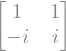

In [125]:
# V = Sdg H
V =  GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2)
display(sympy.Matrix(V.matrix))

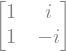

In [124]:
# W = H S
W =  GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi)
display(sympy.Matrix(W.matrix))

**Now Build Clifford Gates Using IonQ Native Gates**

Since the Clifford group is defined as the group of unitaries that normalize the Pauli group, we can write the one-qubit elements as $C_1 = AB$, where $A \in \{ I, V, W, H, HV, HW\}$ and $ B \in \{ I, X, Y, Z\}$ 

I=


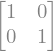

X=


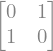

Y=


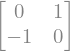

Z=


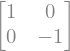

In [127]:
# When A = I

# X   =  GPI(sympy.pi)
# Y   =  GPI(sympy.pi/2)
# Z   =  GZ(sympy.pi/2)
# I   =  GZ(0)
# H   =  GPI(sympy.pi) * GPI2(sympy.pi/2)
# S   =  GPI(sympy.pi/4) * GPI(sympy.pi)
# Sdg =  GPI(-sympy.pi/4) * GPI(sympy.pi)
# V   =  GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2)
# W   =  GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi)

print ("I=")
A = GZ(0)
display(sympy.Matrix(A.matrix))
print ("X=")
A = GPI(sympy.pi)
display(sympy.Matrix(A.matrix))
print ("Y=")
A = GPI(sympy.pi/2)
display(sympy.Matrix(A.matrix))
print ("Z=")
A = GZ(sympy.pi/2)
display(sympy.Matrix(A.matrix))

V=


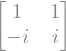

VX=


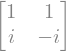

VY=


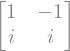

VZ=


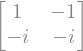

In [128]:
# When A = V

# X   =  GPI(sympy.pi)
# Y   =  GPI(sympy.pi/2)
# Z   =  GZ(sympy.pi/2)
# I   =  GZ(0)
# H   =  GPI(sympy.pi) * GPI2(sympy.pi/2)
# S   =  GPI(sympy.pi/4) * GPI(sympy.pi)
# Sdg =  GPI(-sympy.pi/4) * GPI(sympy.pi)
# V   =  GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2)
# W   =  GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi)

A = GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2)
print ("V=")
display(sympy.Matrix(V.matrix))
A = GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi)
print ("VX=")
display(sympy.Matrix(A.matrix))
A = GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/2)
print ("VY=")
display(sympy.Matrix(A.matrix))
A = GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2) * GZ(sympy.pi/2)
print ("VZ=")
display(sympy.Matrix(A.matrix))

W=


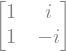

WX=


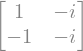

WY=


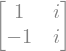

WZ=


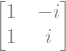

In [129]:
# When A = W

# X   =  GPI(sympy.pi)
# Y   =  GPI(sympy.pi/2)
# Z   =  GZ(sympy.pi/2)
# I   =  GZ(0)
# H   =  GPI(sympy.pi) * GPI2(sympy.pi/2)
# S   =  GPI(sympy.pi/4) * GPI(sympy.pi)
# Sdg =  GPI(-sympy.pi/4) * GPI(sympy.pi)
# V   =  GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2)
# W   =  GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi)


A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi)
print ("W=")
display(sympy.Matrix(A.matrix))
A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi)
print ("WX=")
display(sympy.Matrix(A.matrix))
A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi/2)
print ("WY=")
display(sympy.Matrix(A.matrix))
A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi) * GZ(sympy.pi/2)
print ("WZ=")
display(sympy.Matrix(A.matrix))

H=


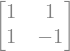

HX=


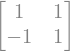

HY=


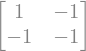

HZ=


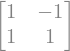

In [130]:
# When A = H

# X   =  GPI(sympy.pi)
# Y   =  GPI(sympy.pi/2)
# Z   =  GZ(sympy.pi/2)
# I   =  GZ(0)
# H   =  GPI(sympy.pi) * GPI2(sympy.pi/2)
# S   =  GPI(sympy.pi/4) * GPI(sympy.pi)
# Sdg =  GPI(-sympy.pi/4) * GPI(sympy.pi)
# V   =  GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2)
# W   =  GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi)

A = GPI(sympy.pi) * GPI2(sympy.pi/2)
print ("H=")
display(sympy.Matrix(A.matrix))
A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi)
print ("HX=")
display(sympy.Matrix(A.matrix))
A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/2)
print ("HY=")
display(sympy.Matrix(A.matrix))
A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GZ(sympy.pi/2)
print ("HZ=")
display(sympy.Matrix(A.matrix))

HV=


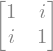

HVX=


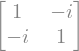

HVY=


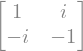

HVZ=


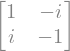

In [131]:
# When A = HV

# X   =  GPI(sympy.pi)
# Y   =  GPI(sympy.pi/2)
# Z   =  GZ(sympy.pi/2)
# I   =  GZ(0)
# H   =  GPI(sympy.pi) * GPI2(sympy.pi/2)
# S   =  GPI(sympy.pi/4) * GPI(sympy.pi)
# Sdg =  GPI(-sympy.pi/4) * GPI(sympy.pi)
# V   =  GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2)
# W   =  GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi)

print ("HV=")
A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2)
display(sympy.Matrix(A.matrix))
A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi)
print ("HVX=")
display(sympy.Matrix(A.matrix))
A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/2)
print ("HVY=")
display(sympy.Matrix(A.matrix))
A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2) * GZ(sympy.pi/2)
print ("HVZ=")
display(sympy.Matrix(A.matrix))

HW=


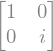

HWX=


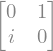

HWY=


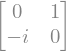

HWZ=


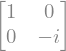

In [133]:
# When A = HW

# X   =  GPI(sympy.pi)
# Y   =  GPI(sympy.pi/2)
# Z   =  GZ(sympy.pi/2)
# I   =  GZ(0)
# H   =  GPI(sympy.pi) * GPI2(sympy.pi/2)
# S   =  GPI(sympy.pi/4) * GPI(sympy.pi)
# Sdg =  GPI(-sympy.pi/4) * GPI(sympy.pi)
# V   =  GPI(-sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi) * GPI2(sympy.pi/2)
# W   =  GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi)

print ("HW=")
A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi)
display(sympy.Matrix(A.matrix))
A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi)
print ("HWX=")
display(sympy.Matrix(A.matrix))
A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi) * GPI(sympy.pi/2)
print ("HWY=")
display(sympy.Matrix(A.matrix))
A = GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi) * GPI2(sympy.pi/2) * GPI(sympy.pi/4) * GPI(sympy.pi) * GZ(sympy.pi/2)
print ("HWZ=")
display(sympy.Matrix(A.matrix))